In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.special import kn
%run INDEX.py

In [5]:
def Boltzmann(w, x, *args):
    Y_chi, Y_z = w #tuple for yields
    s = entropy(m_chi/x) #entropy density, recalculated for each x value
    Y_eq_chi = equilibrium_yield(m_chi, (m_chi/x), g_chi, 0) #equilibrium yield for particle X
    Y_eq_z = equilibrium_yield(m_z, (m_chi/x), g_z, 0) #equilibrium yield for particle Z
    hubble_constant = hubble(m_chi/x) #hubble constant for each x value
    ds_dx = dsdx(x, m_chi) #variation of entropy density with x
    x_z = (m_z * x) / m_chi #argument for bessel functions
    a = crosssection_chichi * (Y_chi**2 - Y_eq_chi**2) #self-annihilation chi + chi -> SM + SM
    b = crosssection_chiz * (Y_chi * Y_z - Y_eq_chi * Y_eq_z) #co-annihilation chi + Z -> SM + SM
    c = (kn(1, x_z)/kn(2, x_z)) * (decaywidth_chiz/s) * (Y_z - Y_chi * (Y_eq_z/Y_eq_chi)) #decay Z -> chi + SM
    d = (gamma_z/s) * (Y_z - Y_chi *(Y_eq_z/Y_eq_chi)) #scatering Z + SM -> chi + SM
    e = (crosssection_chichizz * (Y_z**2 - Y_chi**2 *(Y_eq_z/Y_eq_chi)**2)) #conversion Z + Z -> chi + chi
    f = (crosssection_zz) * (Y_z**2 - Y_eq_z**2) #self-annihilation Z + Z -> SM + SM
    dY_chi = ((1/(3*hubble_constant)) * ds_dx *
              (a + b - c - d - e))
    dY_z = ((1/(3*hubble_constant)) * ds_dx *( f + b + c + d + e))
    return dY_chi, dY_z

2.877354276620515e-13


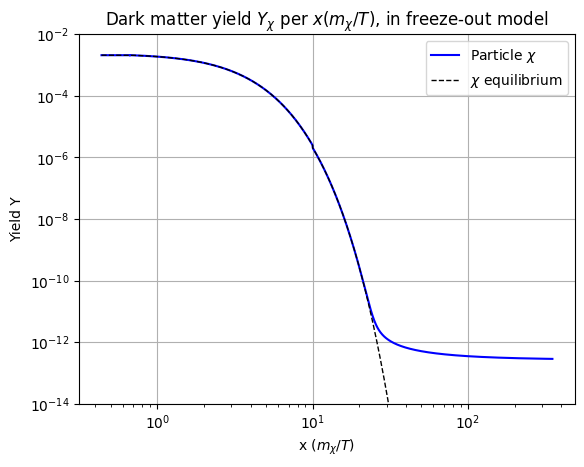

In [6]:
#parameters
m_chi = 700 #DM mass, GeV
m_z = 700 #co-annihilation partner Z mass, in GeV
crosssection_chichi = 4 * 10**(-9) #chi + chi -> SM + SM
crosssection_chiz = 0 #chi + Z -> SM + SM
decaywidth_chiz = 0 # Z -> chi + SM
gamma_z = 0 # Z + SM -> SM + chi
crosssection_chichizz = 0 # Z + Z -> chi + chi
crosssection_zz = 0 # Z + Z -> SM + SM
g_chi = 1 #DM degrees of freedom
g_z = 1 #Z degrees of freedom
T = np.linspace(1600, 2, 9000) #temperature, in GeV
T1 = np.linspace(1600, 1051, 9000)
T2 = np.linspace(1049, 2, 9000)

#variables
x = m_chi/T #integration variable x
x1 = m_chi/T1
x2 = m_chi/T2
y0_chi = equilibrium_yield(m_chi,T[0], g_chi, 0) #inicial value of Y_chi. we consider chi to be in equilibrium at t=0
y0_z = equilibrium_yield(m_z, T[0], g_z, 0) #inicial value of Y_z. we consider z to be in equilibrium at t=0
p =(crosssection_chichi, crosssection_chiz, decaywidth_chiz, gamma_z, crosssection_chichizz, crosssection_zz, m_chi, m_z, g_chi, g_z)

#lists, to save the solution from numerical integration
sol_chi1= list()
sol_z1= list()
sol_chi2= list()
sol_z2= list()

#numerical integration
sol1 = odeint(Boltzmann, [y0_chi, y0_z], x1, args=(p), atol = 10**(-16), rtol = 10**(-14))

#saving solutions from integration on lists
for i in range(0,9000):
    sol_chi1.append(sol1[i][0])
    sol_z1.append(sol1[i][1])
    
sol2 = odeint(Boltzmann, [sol_chi1[-1], sol_z1[-1]], x2, args=(p), atol = 10**(-16), rtol = 10**(-9))

#saving solutions from integration on lists
for i in range(0,9000):
    sol_chi2.append(sol2[i][0])
    sol_z2.append(sol2[i][1])

equilibrium = list()
for j in range(0,9000):
    y = equilibrium_yield(m_chi, T[j], g_chi, 0)
    equilibrium.append(y)

print(sol_chi2[-1])
#plot
plt.plot(x1, sol_chi1, label=r'Particle $\chi$', color='blue')
plt.plot(x2, sol_chi2, color='blue')
plt.plot(x, equilibrium,linestyle="dashed", linewidth=1, color='k', label=r'$\chi$ equilibrium')
plt.title("Dark matter yield $Y_{\chi}$ per $x (m_{\chi}/T)$, in freeze-out model")
plt.xlabel(r'x $(m_{\chi}/T)$')
plt.ylim(10e-15, 10e-3)
plt.ylabel('Yield Y')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()
#plt.savefig('Figures/freezeout.png', dpi = 300)

8.512022054368229e-13


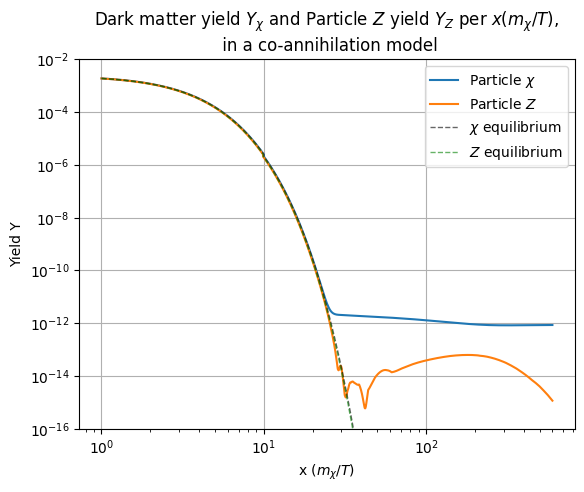

In [7]:
#parameters
m_chi = 900 #DM mass, GeV
m_z = 910 #co-annihilation partner Z mass, in GeV
crosssection_chichi = 10**(-10) #chi + chi -> SM + SM
crosssection_chiz = 2 * 10**(-8) #chi + Z -> SM + SM
decaywidth_chiz = 10**(-16) # Z -> chi + SM
crosssection_z = 10**(-15) # Z + SM -> SM + chi
crosssection_chichizz = 0 # Z + Z -> chi + chi
crosssection_zz = 10**(-8) # Z + Z -> SM + SM
g_chi = 1 #DM degrees of freedom
g_z = 1 #Z degrees of freedom
T = np.linspace(900, 1.5, 9000) #temperature, in GeV

#variables
x = m_chi/T #integration variable x
y0_chi = equilibrium_yield(m_chi,T[0], g_chi, 0) #inicial value of Y_chi. we consider chi to be in equilibrium at t=0
y0_z = equilibrium_yield(m_z, T[0], g_z, 0) #inicial value of Y_q. we consider q to be in equilibrium at t=0
p =(crosssection_chichi, crosssection_chiz, decaywidth_chiz, crosssection_z, crosssection_chichizz, crosssection_zz, m_chi, m_z, g_chi, g_z)

#lists, to save the solution from numerical integration
sol_chi= list()
sol_z= list()

#numerical integration
sol = odeint(Boltzmann, [y0_chi, y0_z], x, args=(p), atol = 10**(-14), rtol = 10**(-17))

#saving solutions from integration on lists
for i in range(0,9000):
    sol_chi.append(sol[i][0])
    sol_z.append(sol[i][1])

equilibrium = list()
for j in range(0,9000):
    y = equilibrium_yield(m_chi, T[j], g_chi, 0)
    equilibrium.append(y)

equilibrium2 = list()
for j in range(0,9000):
    k = equilibrium_yield(m_z, T[j], g_z, 0)
    equilibrium2.append(k)
    

#for i in range(0,9000):
    #print(sol_chi[i],equilibrium[i], x[i])
    #tol = 0.1 * equilibrium[i]
    #if abs(sol_chi[i] - equilibrium[i])>tol:
        #print(x[i])
print(sol_chi[-5])
#plot
plt.plot(x, sol_chi, label=r'Particle $\chi$')
plt.plot(x, sol_z, label=r'Particle $Z$')
plt.plot(x, equilibrium,linestyle="dashed", linewidth=1, alpha=0.6, color='k', label=r'$\chi$ equilibrium')
plt.plot(x, equilibrium2,linestyle="dashed", linewidth=1, alpha=0.6, color='g', label=r'$Z$ equilibrium')
plt.title("Dark matter yield $Y_{\chi}$ and Particle $Z$ yield $Y_{Z}$ per $x (m_{\chi}/T)$, \n in a co-annihilation model")
plt.xlabel(r'x $(m_{\chi}/T)$')
plt.ylabel(r'Yield Y')
plt.yscale('log')
plt.ylim(10e-17,10e-3)
plt.xscale('log')
plt.legend()
plt.grid()
#plt.savefig('Figures/coann.png', dpi = 300)